## Observations and Insights 

In [23]:
# Import Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import sklearn.datasets as dta
import matplotlib.patches as mpatches
import random
from collections import Counter


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read both data files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine both data into a single dataset
combined_mouse_study_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_mouse_study_results_df = pd.DataFrame(combined_mouse_study_results)

# Display head and tail of the data table for preview
# combined_mouse_study_results.info()
# combined_mouse_study_results_df.head(5).append(combined_mouse_study_results_df.tail(5))

In [24]:
# Checking the number of mice on the combine dataframe
combined_mouse_study_results_df["Mouse ID"].count()

1893

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 

In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_results_data = combined_mouse_study_results_df.drop_duplicates("Mouse ID", keep='last') #remove duplicates from "Mouse ID column keeping the last data"
clean_mouse_study_results_data_df = pd.DataFrame(clean_mouse_study_results_data).reset_index(drop=True) # reset index back to 0 for clean dataframe
# clean_mouse_study_results_data_df.head(3).append(clean_mouse_study_results_data_df.tail(5)) # preview 

In [26]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study_results_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            249 non-null    object 
 1   Drug Regimen        249 non-null    object 
 2   Sex                 249 non-null    object 
 3   Age_months          249 non-null    int64  
 4   Weight (g)          249 non-null    int64  
 5   Timepoint           249 non-null    int64  
 6   Tumor Volume (mm3)  249 non-null    float64
 7   Metastatic Sites    249 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.7+ KB


## Summary Statistics

##### Summary Statistics 1 -   Multiple series (Tumor volume for each regimen)

In [27]:
#Get select data column for calculation
drug_and_tumor = clean_mouse_study_results_data_df[["Drug Regimen","Tumor Volume (mm3)"]]
drug_and_tumor = drug_and_tumor.set_index("Drug Regimen")
drug_and_tumor.head()

,Tumor Volume (mm3)
Drug Regimen,
Ramicane,22.050126
Capomulin,23.343598
Capomulin,28.484033
Capomulin,28.430964
Ramicane,29.128472


In [28]:
#Get mean and rename column from Tumor Volume (mm3) to mean 
mean = drug_and_tumor.groupby(level=0).mean()
mean = mean.rename(columns={"Tumor Volume (mm3)": "Mean"})
# mean

In [29]:
#Get median and rename column from Tumor Volume (mm3) to meadian
median = drug_and_tumor.groupby(level=0).median()
median = median.rename(columns={"Tumor Volume (mm3)": "Median"})
# median

In [30]:
#Get variance and rename column from Tumor Volume (mm3) to variance 
variance = drug_and_tumor.groupby(level=0).var()
variance = variance.rename(columns={"Tumor Volume (mm3)": "Variance"})
# variance

In [31]:
#Get std and rename column from Tumor Volume (mm3) to std 
std = drug_and_tumor.groupby(level=0).std()
std = std.rename(columns={"Tumor Volume (mm3)": "std"})
# std

In [32]:
#Get sem and rename column from Tumor Volume (mm3) to sem 
sem = drug_and_tumor.groupby(level=0).sem()
sem = sem.rename(columns={"Tumor Volume (mm3)": "sem"})
# sem

In [33]:
#Combine all above results in a df and display results
summary_statistics_01_df = pd.concat([ mean, median,variance,std,sem],join='outer', axis=1)
summary_statistics_01_df

# Format columns
format_mapping={'Mean': '{:,.2f}', 'Median': '{:,.2f}', 'Variance': '{:.2f}','std': '{:.2f}','sem': '{:.2f}'}

for key, value in format_mapping.items():
    summary_statistics_01_df[key] = summary_statistics_01_df[key].apply(value.format)
    
summary_statistics_01_df

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


#### Summary Statistics 2 -   Single Groupby function (Tumor volume for each regimen)

In [174]:
summary_statistics_2_df = clean_mouse_study_results_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var", "std","sem"]).reset_index()

In [175]:
#Chenge index and display results
summary_statistics_2_df.set_index("Drug Regimen")

# # Format columns
format_mapping={'mean': '{:,.2f}', 'median': '{:,.2f}', 'var': '{:.2f}','std': '{:.2f}','sem': '{:.2f}'}
for key, value in format_mapping.items():
    summary_statistics_2_df[key] = summary_statistics_2_df[key].apply(value.format)

summary_statistics_2_df

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,36.67,38.13,32.66,5.72,1.14
1,Ceftamin,57.75,59.85,69.98,8.37,1.67
2,Infubinol,58.18,60.17,74.01,8.60,1.72
3,Ketapril,62.81,64.49,98.92,9.95,1.99
4,Naftisol,61.21,63.28,106.03,10.30,2.06
5,Placebo,60.51,62.03,78.76,8.87,1.77
6,Propriva,56.74,55.84,69.35,8.33,1.67
7,Ramicane,36.19,36.56,32.17,5.67,1.13
8,Stelasyn,61.00,62.19,90.33,9.50,1.94
9,Zoniferol,59.18,61.84,76.86,8.77,1.75


## Bar and Pie Charts

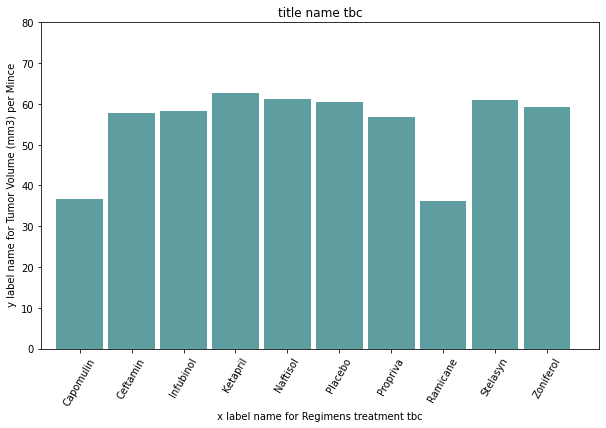

<Figure size 720x432 with 0 Axes>

In [164]:
# Display total number of mice for each treatment throughout the course of the study using pandas.

mince_number_and_drug = summary_statistics_2_df[["Drug Regimen","mean"]] # isolate columns for plot and change index accordingly
mince_number_and_drug = mince_number_and_drug.set_index("Drug Regimen") 
# mince_number_and_drug.head() # preview data

#create the bar plot using pandas plot function and adjust format
mince_number_and_drug.plot(kind="bar",legend=False,width=0.9,figsize=(10,6),color='cadetblue',rot=60)

plt.title("title name tbc")
plt.xlabel(" x label name for Regimens treatment tbc ")
plt.ylabel(" y label name for Tumor Volume (mm3) per Mince")

plt.xlim(-0.75, len(summary_statistics_2_df),100)
plt.ylim(0,80)

plt.show()
plt.tight_layout()

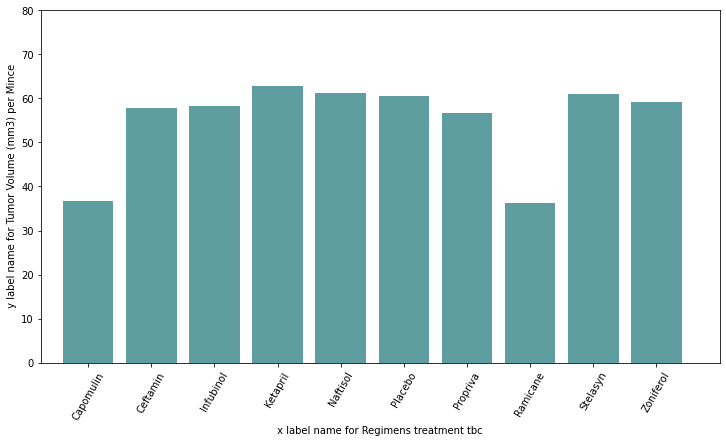

In [163]:
# Display total number of mice for each treatment throughout the course of the study using pyplot.

#Get x-axis and tick location )
x_axis = np.arange(len(summary_statistics_2_df))
tick_locations = [value for value in x_axis]

#create the bar plot using pyplot function and adjust  format to much with the pandas
plt.bar(x_axis, summary_statistics_2_df["mean"], color='cadetblue', alpha=1, align="center",)
plt.xticks(tick_locations, summary_statistics_2_df["Drug Regimen"], rotation=60)
plt.tight_layout()

plt.xlim(-0.75, len(x_axis),100)
plt.ylim(0, 80)
plt.rc('figure', figsize=(10,6))


plt.title("title name tbc")
plt.xlabel(" x label name for Regimens treatment tbc ")
plt.ylabel(" y label name for Tumor Volume (mm3) per Mince")

plt.show()

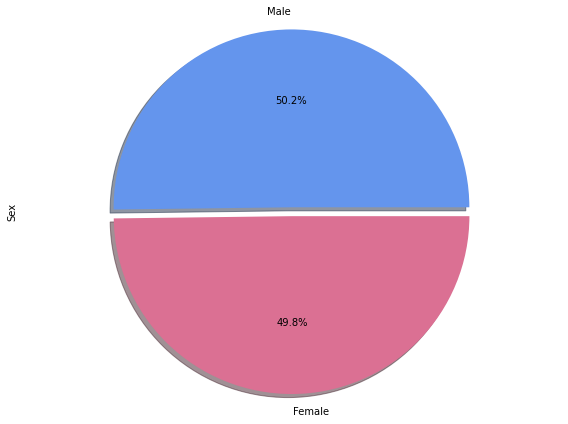

In [39]:
# Display a pie plot showing the distribution of female versus male mice using pandas

#create the pie plot using pandas plot function and adjust standard format
clean_mouse_study_results_data_df["Sex"].value_counts().plot(kind='pie', autopct='%1.1f%%',shadow=True, explode=(0,0.05),
     startangle=0,  fontsize=10, legend=False,figsize=(8,6),
     colors = ['cornflowerblue', 'palevioletred'] )


plt.title("")
# blue_patch = mpatches.Patch(color="cornflowerblue", label="Female")
# # red_patch = mpatches.Patch(color="palevioletred", label="Male")
# plt.legend(handles=[red_patch,blue_patch],loc="best")


plt.axis("equal")
plt.tight_layout()
plt.show()



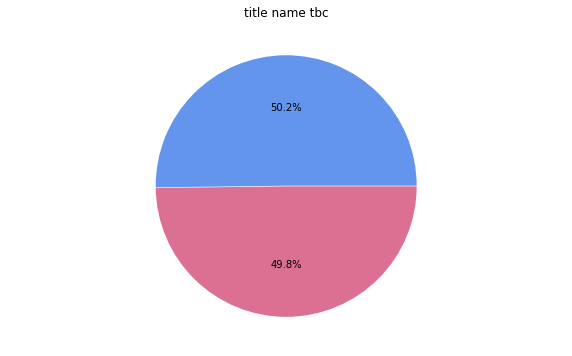

<Figure size 576x432 with 0 Axes>

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("title name tbc")
labels = ["Male tbc", "Female tbc"]
male_and_female = clean_mouse_study_results_data_df[["Mouse ID","Sex"]]
male_and_female = male_and_female.set_index("Mouse ID")

males_fameles_count = male_and_female.value_counts()

colors = ['cornflowerblue', 'palevioletred']

explode = (0, 0.005)
plt.axis("equal")

#create the pie plot using pyplot function and adjust  format to much with the pandas
plt.pie(males_fameles_count,explode = explode, labels = labels, colors = colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.figure(figsize=(8, 6))


plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: # Capomulin, Ramicane, Infubinol, and Ceftamin

# Sort values for calculation
sorting_values = clean_mouse_study_results_data_df.sort_values(['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']).groupby('Mouse ID').head(4).set_index('Drug Regimen')
# sorting_values

#get the last (greatest) timepoint for each mouse for all treatment regimens and preview
timepoint_volume = sorting_values.nlargest(4, 'Timepoint',keep='all')
timepoint_volume_df = pd.DataFrame(timepoint_volume)
tumor_volume = timepoint_volume_df['Tumor Volume (mm3)']
tumor_volume_df= pd.DataFrame(tumor_volume)
tumor_volume_df  

#Get data for the four of the treatment regimens required and preview
selected_treatment_regimens = tumor_volume_df .loc[['Capomulin', 'Ramicane','Infubinol','Ceftamin'],:]
selected_treatment_regimens

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,38.982878
Capomulin,38.939633
Capomulin,37.074024
Capomulin,40.159220
Capomulin,47.685963
...,...
Ceftamin,67.527482
Ceftamin,64.634949
Ceftamin,61.386660


In [42]:
#Get IQR and print result
Q1 = selected_treatment_regimens['Tumor Volume (mm3)'].quantile(0.25)
Q3 = selected_treatment_regimens['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

28.66218635


In [146]:
# quartiles = selected_treatment_regimens['Tumor Volume (mm3)'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile is: {lowerq}")
# print(f"The upper quartile is: {upperq}")
# print(f"The interquartile range is: {iqr}")
# print(f"The the median  is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

Text(0, 0.5, 'y label name tbc')

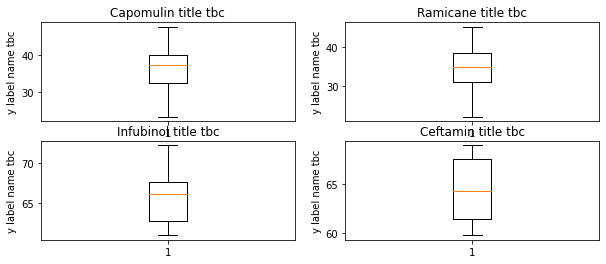

In [159]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Generate the plot data for each regimens 
selected_treatment = selected_treatment_regimens.reset_index()
selected_treatment.value_counts()

#Get data for each regimens and convert to list
Capomulin = selected_treatment.loc[selected_treatment['Drug Regimen'] == 'Capomulin']
Ramicane = selected_treatment.loc[selected_treatment['Drug Regimen'] == 'Ramicane']
Infubinol = selected_treatment.loc[selected_treatment['Drug Regimen'] == 'Infubinol']
Ceftamin = selected_treatment.loc[selected_treatment['Drug Regimen'] == 'Ceftamin']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,4))
# fig1, ax1 = plt.subplots()
ax1.boxplot(Capomulin['Tumor Volume (mm3)'])
ax1.set_title('Capomulin title tbc')
ax1.set_ylabel('y label name tbc')

# fig1, ax2 = plt.subplots()
ax2.boxplot(Ramicane['Tumor Volume (mm3)'])
ax2.set_title('Ramicane title tbc')
ax2.set_ylabel('y label name tbc')

# fig1, ax3 = plt.subplots()
ax3.boxplot(Infubinol['Tumor Volume (mm3)'])
ax3.set_title('Infubinol title tbc')
ax3.set_ylabel('y label name tbc')

# fig1, ax4 = plt.subplots()
ax4.boxplot(Ceftamin['Tumor Volume (mm3)'])
ax4.set_title('Ceftamin title tbc')
ax4.set_ylabel('y label name tbc')
# plt.show()



## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_vs_tumor_volume = timepoint_volume.loc[['Capomulin'],['Tumor Volume (mm3)','Timepoint']]
# Capomulin_tumor_volume.head()

In [ ]:
plt.title ("title")
plt.xlabel("X Label")
plt.ylabel("y Label")
plt.hlines (35,0,25, color="black", alpha=0.5)
plt.rc('figure', figsize=(10,6))

x_axis = np.arange(len(Capomulin_vs_tumor_volume['Timepoint']))
# x_axis

y_axis = Capomulin_vs_tumor_volume['Tumor Volume (mm3)']
# y_axis
plt.plot(x_axis,y_axis, color = "blue")


In [147]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_mouse_weight = timepoint_volume.loc[['Capomulin'],['Tumor Volume (mm3)','Weight (g)']]
# Capomulin_mouse_weight.head()

In [148]:
mean_tumor_vol_cap = Capomulin_mouse_weight.groupby('Tumor Volume (mm3)').mean()
mean_tumor_vol_cap = mean_tumor_vol_cap.reset_index()
# mean_tumor_vol_cap.head()

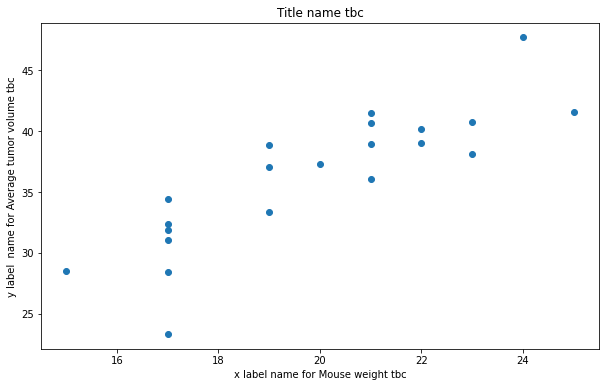

In [158]:
plt.title('Title name tbc')
plt.xlabel('x label name for Mouse weight tbc')
plt.ylabel("y label  name for Average tumor volume tbc" )

plt.scatter(mean_tumor_vol_cap['Weight (g)'], mean_tumor_vol_cap['Tumor Volume (mm3)'])

plt.show()

## Correlation and Regression

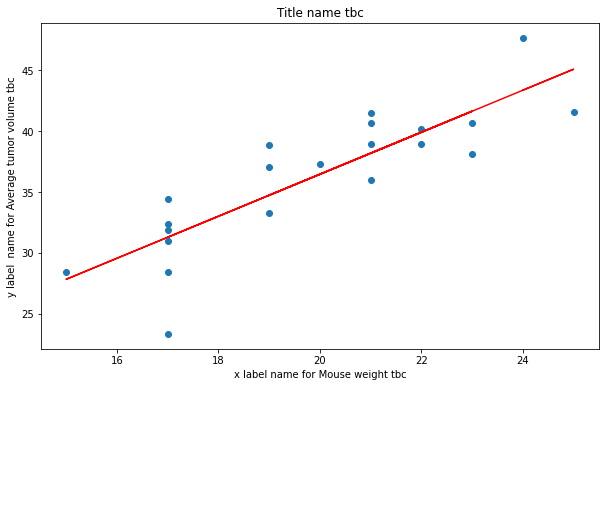

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.85


In [155]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = mean_tumor_vol_cap['Weight (g)']
y_values = mean_tumor_vol_cap['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")

plt.title('Title name tbc')
plt.xlabel('x label name for Mouse weight tbc')
plt.ylabel("y label  name for Average tumor volume tbc" )
plt.show()

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(mean_tumor_vol_cap['Weight (g)'], mean_tumor_vol_cap['Tumor Volume (mm3)'])[0],2)}")